In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings 
warnings.filterwarnings('ignore')

In [3]:
df1 =  pd.read_csv('application_data.csv.zip')
df2 =  pd.read_csv('previous_application.csv.zip')

In [4]:
df3 = pd.merge(df1,df2,on='SK_ID_CURR',how='outer',indicator=True)

In [41]:
ranges = [25649,120000,200000,117000000]
df1['INCOME_BINS'] = pd.cut(df1['AMT_INCOME_TOTAL'],bins=ranges,precision=0, labels=['Low','Medium','High' ])

df1['INCOME_BINS'].value_counts()

Medium    116259
Low       103337
High       87915
Name: INCOME_BINS, dtype: int64

In [75]:
df1['Age']=df1['DAYS_BIRTH']//365

In [76]:
ranges = [-100,-70,-50,-35,-18]
df1['Age_bins'] = pd.cut(df1['Age'],bins=ranges,precision=0,labels=['Silent','GenX','Boomer','Millennial'])
df1['Age_bins'].value_counts()

Boomer        120399
GenX          110263
Millennial     76833
Silent            16
Name: Age_bins, dtype: int64

In [33]:

a = df1.groupby(['NAME_EDUCATION_TYPE','NAME_INCOME_TYPE','TARGET']).count()[['SK_ID_CURR']]
a_level1 = df1.groupby(['NAME_EDUCATION_TYPE','NAME_INCOME_TYPE']).count()[['SK_ID_CURR']]
a_default = a/a_level1*100
a['TotalCount'] = a_level1['SK_ID_CURR']
a['Defaulter_rates'] = a_default['SK_ID_CURR']
a.drop(['SK_ID_CURR'],axis=1,inplace=True)
# a = a.rename(columns={'SK_ID_CURR':'COUNTwrtTarget'})
a = a.unstack().drop([('Defaulter_rates', 0),('TotalCount', 0)],axis=1).fillna(0).stack()
a = a.reset_index(level=-1).drop('TARGET',axis=1)
a['Proportions'] = a['TotalCount']/len(df1)*100
education_type = a.reset_index()
education_type = education_type.drop(23).reset_index(drop=True)

In [45]:
a = df1.groupby(['Age_bins','TARGET']).count()[['SK_ID_CURR']]
a_level1 = a.groupby(level=0).sum()
a_default = a/a_level1*100
a['Defaulter_rates'] = a_default
a = a.drop(0,level=-1).droplevel(level=-1)
a['SK_ID_CURR'] = a_level1['SK_ID_CURR']/len(df1)*100
a = a.rename(columns={'SK_ID_CURR':'TotalCount'}).reset_index()
a

,Age_bins,TotalCount,Defaulter_rates
0,Silent,0.005203,NaN
1,GenX,35.856604,5.812467
2,Boomer,39.152746,8.278308
3,Millennial,24.985448,10.996577


In [31]:
df1

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,Age,Age_bins
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0.0,0.0,0.0,0.0,0.0,1.0,-26,Millennial
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,-46,Boomer
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,-53,GenX
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,-53,GenX
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,-55,GenX
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,-26,Millennial
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,-57,GenX
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,1.0,0.0,0.0,1.0,0.0,1.0,-42,Boomer
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,-33,Millennial


In [47]:
df1['CODE_GENDER']

0         M
1         F
2         M
3         F
4         M
         ..
307506    M
307507    F
307508    F
307509    F
307510    F
Name: CODE_GENDER, Length: 307511, dtype: object

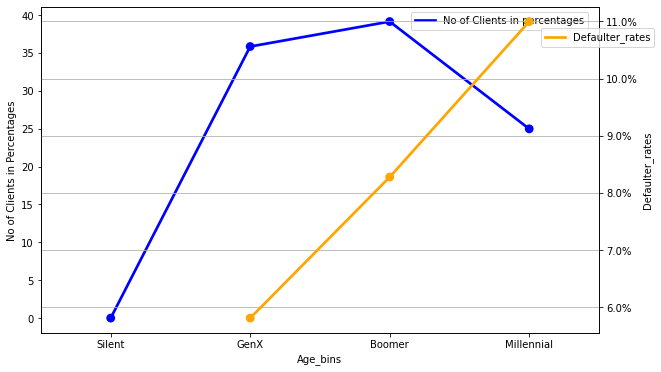

In [50]:
import matplotlib.ticker as mtick
fig, ax1 = plt.subplots(figsize=(10,6))
#figsize=(10,5)


sns.pointplot(x='Age_bins',y='TotalCount',data=a,ax=ax1,color='blue',legend=False)
# ax1.yaxis.set_major_formatter(mtick.PercentFormatter(decimals=2))
ax1.set(ylabel='No of Clients in Percentages')
ax2 = ax1.twinx()


sns.pointplot(x='Age_bins',y='Defaulter_rates',data=a,ax=ax2,color='orange',legend=False)
ax2.yaxis.set_major_formatter(mtick.PercentFormatter())
ax2.legend(labels=['Defaulter_rates'],bbox_to_anchor=(0.88715,0.95))
ax1.legend(labels=['No of Clients in percentages'],bbox_to_anchor=(0.99,1))
ax2.grid(None)

plt.show()

In [52]:
a = df1.groupby(['INCOME_BINS','TARGET']).count()[['SK_ID_CURR']]
a_level1 = a.groupby(level=0).sum()
a_default = a/a_level1*100
a['Defaulter_rates'] = a_default
a = a.drop(0,level=-1).droplevel(level=-1)
a['SK_ID_CURR'] = a_level1['SK_ID_CURR']/len(df1)*100
a = a.rename(columns={'SK_ID_CURR':'TotalCount'}).reset_index()
a

,INCOME_BINS,TotalCount,Defaulter_rates
0,Low,33.604326,8.405508
1,Medium,37.806452,8.485365
2,High,28.589221,7.136439


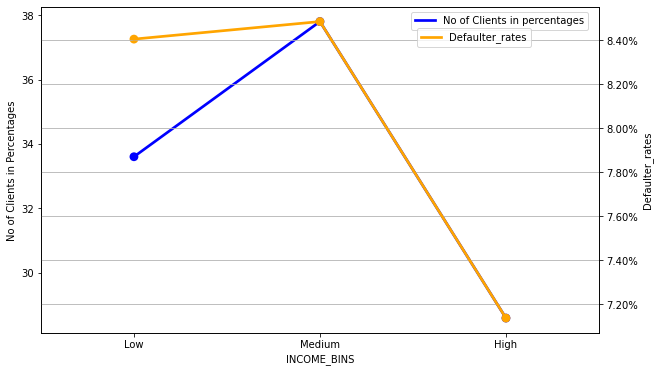

In [53]:
fig, ax1 = plt.subplots(figsize=(10,6))
#figsize=(10,5)


sns.pointplot(x='INCOME_BINS',y='TotalCount',data=a,ax=ax1,color='blue',legend=False)
# ax1.yaxis.set_major_formatter(mtick.PercentFormatter(decimals=2))
ax1.set(ylabel='No of Clients in Percentages')
ax2 = ax1.twinx()


sns.pointplot(x='INCOME_BINS',y='Defaulter_rates',data=a,ax=ax2,color='orange',legend=False)
ax2.yaxis.set_major_formatter(mtick.PercentFormatter())
ax2.legend(labels=['Defaulter_rates'],bbox_to_anchor=(0.88715,0.95))
ax1.legend(labels=['No of Clients in percentages'],bbox_to_anchor=(0.99,1))
ax2.grid(None)

plt.show()

In [61]:
a = df1.groupby(['CODE_GENDER','TARGET']).count()[['SK_ID_CURR']]
a_level1 = a.groupby(level=0).sum()
a_default = a/a_level1*100
a['Defaulter_rates'] = a_default
a = a.drop(0,level=-1).droplevel(level=-1)
a['SK_ID_CURR'] = a_level1['SK_ID_CURR']/len(df1)*100
a = a.rename(columns={'SK_ID_CURR':'TotalCount'}).reset_index()
a

,CODE_GENDER,TotalCount,Defaulter_rates
0,F,65.834393,6.999328
1,M,34.164306,10.141920


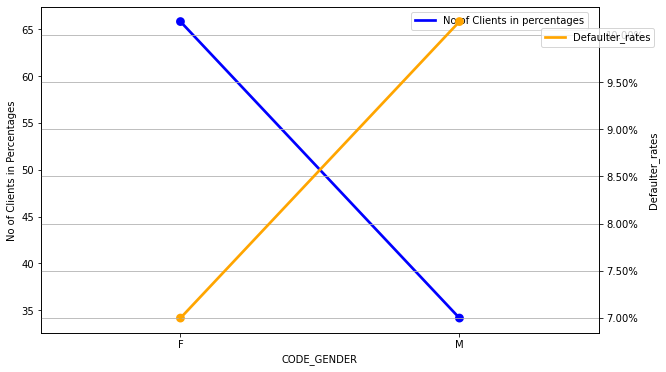

In [62]:
fig, ax1 = plt.subplots(figsize=(10,6))
#figsize=(10,5)


sns.pointplot(x='CODE_GENDER',y='TotalCount',data=a,ax=ax1,color='blue',legend=False)
# ax1.yaxis.set_major_formatter(mtick.PercentFormatter(decimals=2))
ax1.set(ylabel='No of Clients in Percentages')
ax2 = ax1.twinx()


sns.pointplot(x='CODE_GENDER',y='Defaulter_rates',data=a,ax=ax2,color='orange',legend=False)
plt.xticks(rotation=45)
ax2.yaxis.set_major_formatter(mtick.PercentFormatter())
ax2.legend(labels=['Defaulter_rates'],bbox_to_anchor=(0.88715,0.95))
ax1.legend(labels=['No of Clients in percentages'],bbox_to_anchor=(0.99,1))
ax2.grid(None)

plt.show()

In [81]:
a = df1.groupby(['OCCUPATION_TYPE','TARGET','CODE_GENDER']).count()[['SK_ID_CURR']]
a_level1 = a.groupby(level=0).sum()
a_default = a/a_level1*100
a['Defaulter_rates'] = a_default
a = a.drop(0,level=-1).droplevel(level=-1)
a['SK_ID_CURR'] = a_level1['SK_ID_CURR']/len(df1)*100
a = a.rename(columns={'SK_ID_CURR':'TotalCount'}).reset_index()
a

KeyError: 'labels [0] not found in level'

In [85]:
a = df1.groupby(['OCCUPATION_TYPE','TARGET','CODE_GENDER']).count()[['SK_ID_CURR']]
a_level1 = a.groupby(level=0).sum()
a_default = a/a_level1*100
a['Defaulter_rates'] = a_default


In [84]:
a = df1.groupby(['OCCUPATION_TYPE','TARGET','CODE_GENDER']).count()[['SK_ID_CURR']]
a_level1 = a.groupby(level=0).sum()
a_default = a/a_level1*100
a['Defaulter_rates'] = a_default

In [88]:
sns.factorplot('Defaulter_rates','OCCUPATION_TYPE',data=a)

ValueError: Could not interpret input 'OCCUPATION_TYPE'

In [90]:
a = df3.groupby(['NAME_CONTRACT_STATUS','TARGET']).count()[['SK_ID_CURR']]
a_level1 = a.groupby(level=0).sum()
a_default = a/a_level1*100
a['Defaulter_rates'] = a_default
a = a.drop(0,level=-1).droplevel(level=-1)
a['SK_ID_CURR'] = a_level1['SK_ID_CURR']/len(df3)*100
a = a.rename(columns={'SK_ID_CURR':'TotalCount'}).reset_index()
a

,NAME_CONTRACT_STATUS,TotalCount,Defaulter_rates
0,Approved,52.535472,7.588655
1,Canceled,15.381865,9.173569
2,Refused,14.548803,11.996414
3,Unused offer,1.350058,8.251724


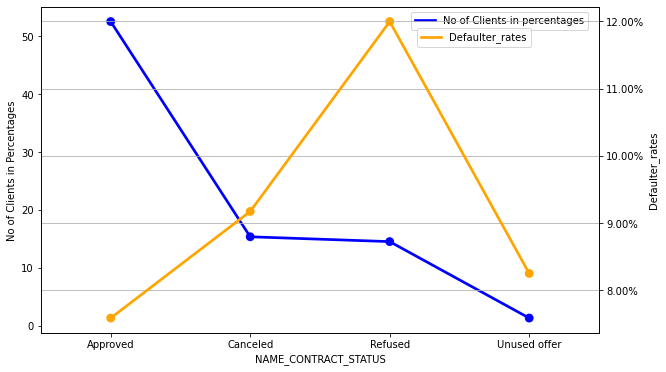

In [91]:
fig, ax1 = plt.subplots(figsize=(10,6))
#figsize=(10,5)


sns.pointplot(x='NAME_CONTRACT_STATUS',y='TotalCount',data=a,ax=ax1,color='blue',legend=False)
# ax1.yaxis.set_major_formatter(mtick.PercentFormatter(decimals=2))
ax1.set(ylabel='No of Clients in Percentages')
ax2 = ax1.twinx()


sns.pointplot(x='NAME_CONTRACT_STATUS',y='Defaulter_rates',data=a,ax=ax2,color='orange',legend=False)
plt.xticks(rotation=45)
ax2.yaxis.set_major_formatter(mtick.PercentFormatter())
ax2.legend(labels=['Defaulter_rates'],bbox_to_anchor=(0.88715,0.95))
ax1.legend(labels=['No of Clients in percentages'],bbox_to_anchor=(0.99,1))
ax2.grid(None)

plt.show()

In [93]:
a = df3.groupby(['NAME_INCOME_TYPE','TARGET']).count()[['SK_ID_CURR']]
a_level1 = a.groupby(level=0).sum()
a_default = a/a_level1*100
a['Defaulter_rates'] = a_default
a = a.drop(0,level=-1).droplevel(level=-1)
a['SK_ID_CURR'] = a_level1['SK_ID_CURR']/len(df3)*100
a = a.rename(columns={'SK_ID_CURR':'TotalCount'}).reset_index()
a

,NAME_INCOME_TYPE,TotalCount,Defaulter_rates
0,Commercial associate,19.420716,8.057381
1,Maternity leave,0.001126,84.210526
2,Pensioner,16.382774,5.827962
3,State servant,5.660154,6.390623
4,Unemployed,0.007648,51.937984
5,Working,43.316942,10.218679


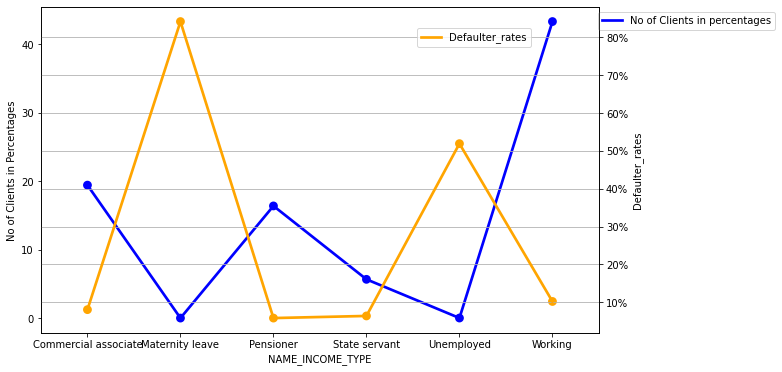

In [94]:
fig, ax1 = plt.subplots(figsize=(10,6))
#figsize=(10,5)


sns.pointplot(x='NAME_INCOME_TYPE',y='TotalCount',data=a,ax=ax1,color='blue',legend=False)
# ax1.yaxis.set_major_formatter(mtick.PercentFormatter(decimals=2))
ax1.set(ylabel='No of Clients in Percentages')
ax2 = ax1.twinx()


sns.pointplot(x='NAME_INCOME_TYPE',y='Defaulter_rates',data=a,ax=ax2,color='orange',legend=False)
plt.xticks(rotation=45)
ax2.yaxis.set_major_formatter(mtick.PercentFormatter())
ax2.legend(labels=['Defaulter_rates'],bbox_to_anchor=(0.88715,0.95))
ax1.legend(labels=['No of Clients in percentages'],bbox_to_anchor=(0.99,1))
ax2.grid(None)

plt.show()

In [98]:
a = df3.groupby(['NAME_CASH_LOAN_PURPOSE','TARGET']).count()[['SK_ID_CURR']]
a_level1 = a.groupby(level=0).sum()
a_default = a/a_level1*100
a['Defaulter_rates'] = a_default
a = a.drop(0,level=-1).droplevel(level=-1)
a['SK_ID_CURR'] = a_level1['SK_ID_CURR']/len(df3)*100
a = a.rename(columns={'SK_ID_CURR':'TotalCount'}).reset_index()
a

,NAME_CASH_LOAN_PURPOSE,TotalCount,Defaulter_rates
0,Building a house or an annex,0.138972,13.822526
1,Business development,0.021285,12.813370
2,Buying a garage,0.006877,6.034483
3,Buying a holiday home / land,0.027451,11.879050
4,Buying a home,0.041561,11.982882
5,Buying a new car,0.052530,9.029345
6,Buying a used car,0.146383,12.879708
7,Car repairs,0.040968,18.379161
8,Education,0.079091,10.494753
9,Everyday expenses,0.121660,10.526316


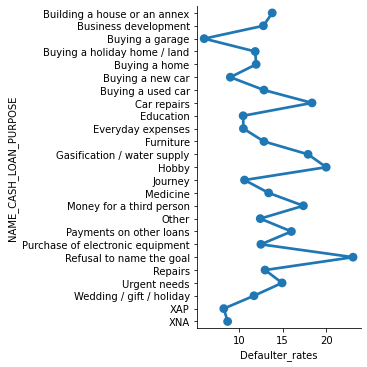

In [99]:
sns.factorplot('Defaulter_rates','NAME_CASH_LOAN_PURPOSE',data=a)